# Importation des données

##Chargement du drive

In [24]:
pip install folium

In [25]:
import geopandas as gpd
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from os import listdir
from os.path import isfile, join
from shapely import line_merge, MultiLineString
from shapely.geometry import Point, MultiPoint
from shapely.geometry import Polygon, MultiPolygon
import os
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, LayerControl, GeoJsonTooltip
from pyproj import Transformer
from branca.element import MacroElement
from jinja2 import Template
import branca.colormap as cm

In [26]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

# il vous faut ajouter un raccourci du dossier partagé dans votre drive (clique droit sur PIP_2024_G5 -> Organiser -> Ajouter un raccourci -> Mon Drive)

Mounted at /content/drive


##Chargement des données

In [35]:
path="/content/drive/MyDrive/PIP2025_G8/Donnees/Autres données/"

fichiers_csv = [f for f in os.listdir(path) if f.endswith('.csv')] # Noms des CSV du dossier
fichiers_csv

['nb_voiture_commune_dep.csv',
 'population_par_region_prediction.csv',
 'recensementNettoye.csv',
 'Bornes_nettoye2.csv',
 'Bornes_nettoye3.csv',
 'nb_voiture_annee_cdr.csv',
 'nb_voiture_annee_cdr_v2.csv',
 'véhicules_électriques_bornes_Départements.csv',
 'tmja_departement.csv',
 'tmja_regions.csv',
 'bornes_tmja_départements.csv',
 'Pred_Reg.csv',
 'Pred_Reg_tout.csv',
 'véhicules_électriques_bornes_Departements.csv',
 'véhicules_électriques_bornes_Régions.csv',
 'borne_tmja_regions.csv',
 'population2.csv',
 'tab_reco_borne_pour_ve.csv',
 'nb_vehicules_par_trimestre_france_metropolitaine.csv',
 'predictions_vehicules_france_metro.csv',
 'bornes_completes2.csv',
 'tab_reco_borne_pour_ve2.csv']

In [36]:
reco = pd.read_csv(path + fichiers_csv[17], sep=';', low_memory=False)
reco

Region  Trimestre  Forecast_Values  Bornes_Existantes  \
0      11.0          1    423748.455159              19365   
1      11.0          2    448506.691651              19365   
2      11.0          3    482854.805023              19365   
3      11.0          4    513074.638071              19365   
4      11.0          5    539119.312251              19365   
..      ...        ...              ...                ...   
307    94.0         20     48462.964278                500   
308    94.0         21     49766.317549                500   
309    94.0         22     51097.037954                500   
310    94.0         23     52989.805937                500   
311    94.0         24     55528.299135                500   

     Bornes_A_Ajouter_Trimestrielles    Region_Name sens_trimestre  
0                              23009  Île-de-France        T1 2025  
1                              25485  Île-de-France        T2 2025  
2                              28920  Île-de-France        T3 2025  
3                              31942  Île-de-France        T4 2025  
4                              34546  Île-de-France        T1 2026  
..                               ...            ...            ...  
307                              353          Corse        T4 2029  
308                              270          Corse        T1 2030  
309                              190          Corse        T2 2030  
310                              138          Corse        T3 2030  
311                              191          Corse        T4 2030  

[312 rows x 7 columns]

#Traitement données

In [29]:
ligne = reco.loc[reco['Region'] == 11]
ligne

Region  Trimestre  Forecast_Values  Bornes_Existantes  \
0     11.0          1     4.237485e+05              19365   
1     11.0          2     4.485067e+05              19365   
2     11.0          3     4.828548e+05              19365   
3     11.0          4     5.130746e+05              19365   
4     11.0          5     5.391193e+05              19365   
5     11.0          6     5.638775e+05              19365   
6     11.0          7     5.982257e+05              19365   
7     11.0          8     6.284455e+05              19365   
8     11.0          9     6.544902e+05              19365   
9     11.0         10     6.792484e+05              19365   
10    11.0         11     7.135965e+05              19365   
11    11.0         12     7.438164e+05              19365   
12    11.0         13     7.698610e+05              19365   
13    11.0         14     7.946193e+05              19365   
14    11.0         15     8.289674e+05              19365   
15    11.0         16     8.591872e+05              19365   
16    11.0         17     8.852319e+05              19365   
17    11.0         18     9.099901e+05              19365   
18    11.0         19     9.443382e+05              19365   
19    11.0         20     9.745581e+05              19365   
20    11.0         21     1.000603e+06              19365   
21    11.0         22     1.025361e+06              19365   
22    11.0         23     1.059709e+06              19365   
23    11.0         24     1.089929e+06              19365   

    Bornes_A_Ajouter_Trimestrielles    Region_Name sens_trimestre  
0                             23009  Île-de-France        T1 2025  
1                             25485  Île-de-France        T2 2025  
2                             28920  Île-de-France        T3 2025  
3                             31942  Île-de-France        T4 2025  
4                             34546  Île-de-France        T1 2026  
5                             37022  Île-de-France        T2 2026  
6                             40457  Île-de-France        T3 2026  
7                             43479  Île-de-France        T4 2026  
8                             46084  Île-de-France        T1 2027  
9                             48559  Île-de-France        T2 2027  
10                            51994  Île-de-France        T3 2027  
11                            55016  Île-de-France        T4 2027  
12                            57621  Île-de-France        T1 2028  
13                            60096  Île-de-France        T2 2028  
14                            63531  Île-de-France        T3 2028  
15                            66553  Île-de-France        T4 2028  
16                            69158  Île-de-France        T1 2029  
17                            71634  Île-de-France        T2 2029  
18                            75068  Île-de-France        T3 2029  
19                            78090  Île-de-France        T4 2029  
20                            80695  Île-de-France        T1 2030  
21                            83171  Île-de-France        T2 2030  
22                            86605  Île-de-France        T3 2030  
23                            89627  Île-de-France        T4 2030

In [30]:
ligne = reco.loc[reco['Region'] == 94]
ligne

Region  Trimestre  Forecast_Values  Bornes_Existantes  \
288    94.0          1     18359.924198                500   
289    94.0          2     19130.000174                500   
290    94.0          3     20643.860259                500   
291    94.0          4     23548.000532                500   
292    94.0          5     24851.353802                500   
293    94.0          6     26182.074207                500   
294    94.0          7     28074.842191                500   
295    94.0          8     30613.335389                500   
296    94.0          9     31833.593817                500   
297    94.0         10     33297.448225                500   
298    94.0         11     34895.364118                500   
299    94.0         12     37727.809479                500   
300    94.0         13     39311.413937                500   
301    94.0         14     40474.818095                500   
302    94.0         15     41110.352575                500   
303    94.0         16     41461.773395                500   
304    94.0         17     43274.887944                500   
305    94.0         18     44044.963921                500   
306    94.0         19     45558.824005                500   
307    94.0         20     48462.964278                500   
308    94.0         21     49766.317549                500   
309    94.0         22     51097.037954                500   
310    94.0         23     52989.805937                500   
311    94.0         24     55528.299135                500   

     Bornes_A_Ajouter_Trimestrielles Region_Name sens_trimestre  
288                             1079       Corse        T1 2025  
289                              999       Corse        T2 2025  
290                              947       Corse        T3 2025  
291                             1000       Corse        T4 2025  
292                              917       Corse        T1 2026  
293                              837       Corse        T2 2026  
294                              785       Corse        T3 2026  
295                              838       Corse        T4 2026  
296                              755       Corse        T1 2027  
297                              675       Corse        T2 2027  
298                              623       Corse        T3 2027  
299                              676       Corse        T4 2027  
300                              594       Corse        T1 2028  
301                              514       Corse        T2 2028  
302                              462       Corse        T3 2028  
303                              514       Corse        T4 2028  
304                              432       Corse        T1 2029  
305                              352       Corse        T2 2029  
306                              300       Corse        T3 2029  
307                              353       Corse        T4 2029  
308                              270       Corse        T1 2030  
309                              190       Corse        T2 2030  
310                              138       Corse        T3 2030  
311                              191       Corse        T4 2030

In [31]:
# Filtrer les données pour la région 94
region_94 = reco[reco["Region"] == 94].copy()

# Trier par Trimestre
region_94 = region_94.sort_values("Trimestre")

# Inverser les valeurs de la colonne 'Bornes_A_Ajouter_Trimestrielles'
region_94["Bornes_A_Ajouter_Trimestrielles"] = region_94["Bornes_A_Ajouter_Trimestrielles"].iloc[::-1].values

# Mettre à jour le DataFrame original
reco.update(region_94)

In [32]:
# Sélectionner uniquement la région 94
df_region_94 = reco[reco["Region"] == 94].copy()

# Calculer la somme cumulée et ajouter les bornes existantes
df_region_94["Bornes_A_Ajouter_Trimestrielles"] = (
    df_region_94["Bornes_A_Ajouter_Trimestrielles"].cumsum()
)

# Réintégrer les modifications dans le dataframe original
reco.update(df_region_94)


reco["Bornes_A_Ajouter_Trimestrielles"] = (reco["Bornes_A_Ajouter_Trimestrielles"]
    + reco["Bornes_Existantes"]
)

In [33]:
ligne = reco.loc[reco['Region'] == 24]
ligne

Region  Trimestre  Forecast_Values  Bornes_Existantes  \
24    24.0          1     57494.558721               4460   
25    24.0          2     61325.500799               4460   
26    24.0          3     64461.489328               4460   
27    24.0          4     67824.590933               4460   
28    24.0          5     70762.294377               4460   
29    24.0          6     74593.236454               4460   
30    24.0          7     77729.224983               4460   
31    24.0          8     81092.326589               4460   
32    24.0          9     84030.030032               4460   
33    24.0         10     87860.972109               4460   
34    24.0         11     90996.960639               4460   
35    24.0         12     94360.062244               4460   
36    24.0         13     97297.765687               4460   
37    24.0         14    101128.707765               4460   
38    24.0         15    104264.696294               4460   
39    24.0         16    107627.797899               4460   
40    24.0         17    110565.501343               4460   
41    24.0         18    114396.443420               4460   
42    24.0         19    117532.431949               4460   
43    24.0         20    120895.533555               4460   
44    24.0         21    123833.236998               4460   
45    24.0         22    127664.179075               4460   
46    24.0         23    130800.167605               4460   
47    24.0         24    134163.269210               4460   

    Bornes_A_Ajouter_Trimestrielles          Region_Name sens_trimestre  
24                             5749  Centre-Val de Loire        T1 2025  
25                             6132  Centre-Val de Loire        T2 2025  
26                             6446  Centre-Val de Loire        T3 2025  
27                             6782  Centre-Val de Loire        T4 2025  
28                             7076  Centre-Val de Loire        T1 2026  
29                             7459  Centre-Val de Loire        T2 2026  
30                             7772  Centre-Val de Loire        T3 2026  
31                             8109  Centre-Val de Loire        T4 2026  
32                             8403  Centre-Val de Loire        T1 2027  
33                             8786  Centre-Val de Loire        T2 2027  
34                             9099  Centre-Val de Loire        T3 2027  
35                             9436  Centre-Val de Loire        T4 2027  
36                             9729  Centre-Val de Loire        T1 2028  
37                            10112  Centre-Val de Loire        T2 2028  
38                            10426  Centre-Val de Loire        T3 2028  
39                            10762  Centre-Val de Loire        T4 2028  
40                            11056  Centre-Val de Loire        T1 2029  
41                            11439  Centre-Val de Loire        T2 2029  
42                            11753  Centre-Val de Loire        T3 2029  
43                            12089  Centre-Val de Loire        T4 2029  
44                            12383  Centre-Val de Loire        T1 2030  
45                            12766  Centre-Val de Loire        T2 2030  
46                            13080  Centre-Val de Loire        T3 2030  
47                            13416  Centre-Val de Loire        T4 2030

#Recommandation

In [50]:
chemin_donnees = path + "tab_reco_borne_pour_ve2.csv"
df = pd.read_csv(chemin_donnees, sep=',')
# Dictionnaire des codes région -> noms des régions
region_names = {
    84: "Auvergne-Rhône-Alpes",
    27: "Bourgogne-Franche-Comté",
    53: "Bretagne",
    24: "Centre-Val de Loire",
    94: "Corse",
    44: "Grand Est",
    32: "Hauts-de-France",
    11: "Île-de-France",
    28: "Normandie",
    75: "Nouvelle-Aquitaine",
    76: "Occitanie",
    52: "Pays de la Loire",
    93: "Provence-Alpes-Côte d'Azur",
}

# Ajout de la colonne region_name
df["Nom_region"] = df["Region"].map(region_names)
df

Region  Trimestre  Forecast_Values  Bornes_Existantes  \
0        11          1    423748.455159              19365   
1        11          2    448506.691651              19365   
2        11          3    482854.805023              19365   
3        11          4    513074.638071              19365   
4        11          5    539119.312251              19365   
..      ...        ...              ...                ...   
307      94         20     48462.964278                500   
308      94         21     49766.317549                500   
309      94         22     51097.037954                500   
310      94         23     52989.805937                500   
311      94         24     55528.299135                500   

     Bornes_A_Ajouter_Trimestrielles    Region_Name sens_trimestre  \
0                              23009  Ile-de-France        T1 2025   
1                              25485  Ile-de-France        T2 2025   
2                              28920  Ile-de-France        T3 2025   
3                              31942  Ile-de-France        T4 2025   
4                              34546  Ile-de-France        T1 2026   
..                               ...            ...            ...   
307                              917          Corse        T4 2029   
308                             1000          Corse        T1 2030   
309                              947          Corse        T2 2030   
310                              999          Corse        T3 2030   
311                             1079          Corse        T4 2030   

     somme_borne_a_ajouter  Exponential_Curve  ratio     Nom_region  
0                    42374       19365.000000  21.88  Île-de-France  
1                    67859       20875.781766  21.48  Île-de-France  
2                    96779       22504.428832  21.46  Île-de-France  
3                   128721       24260.136590  21.15  Île-de-France  
4                   163267       26152.817819  20.61  Île-de-France  
..                     ...                ...    ...            ...  
307                  10916        3653.259885  13.27          Corse  
308                  11916        4056.383606  12.27          Corse  
309                  12863        4503.990539  11.34          Corse  
310                  13862        5000.989241  10.60          Corse  
311                  14941        5552.829914  10.00          Corse  

[312 rows x 11 columns]

In [51]:
df['Region'] = df['Region'].astype(int).astype(str)

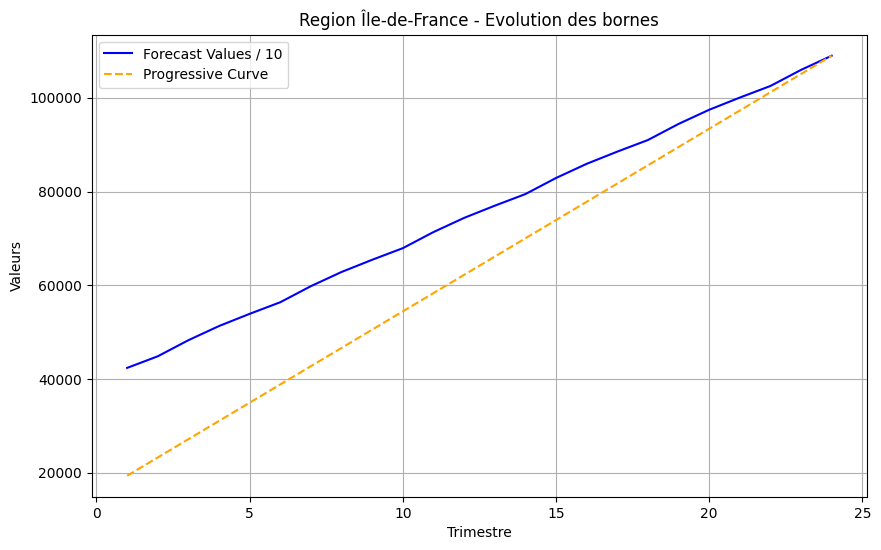

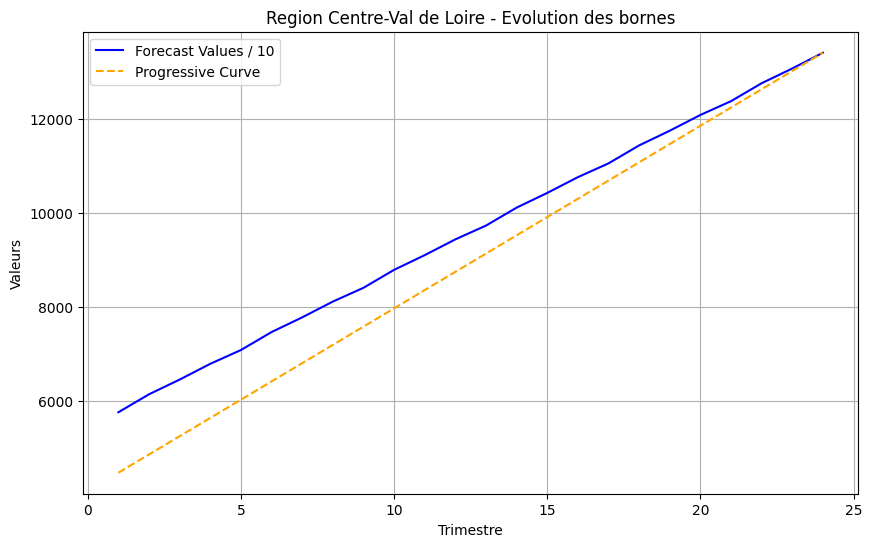

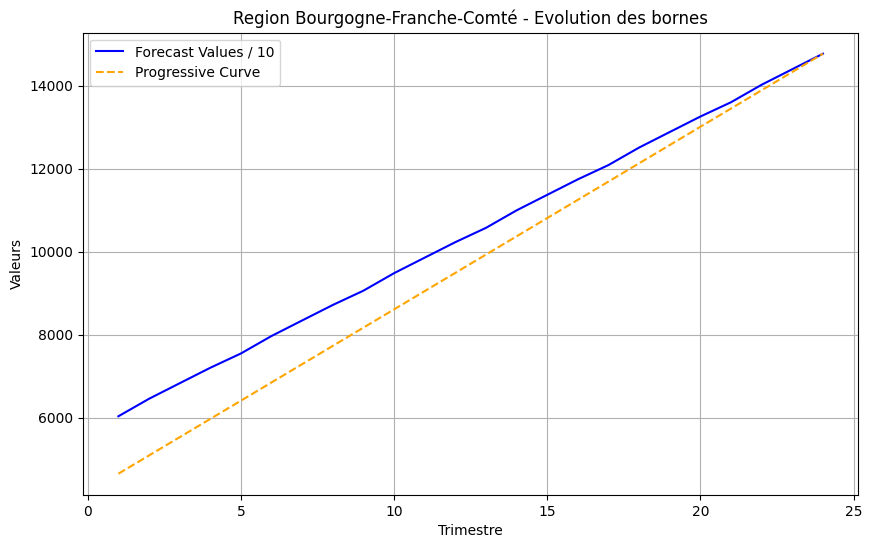

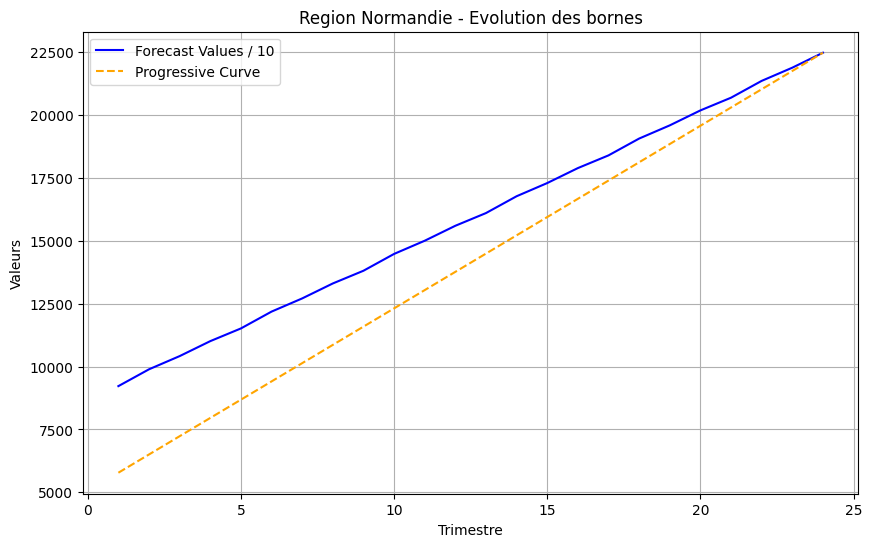

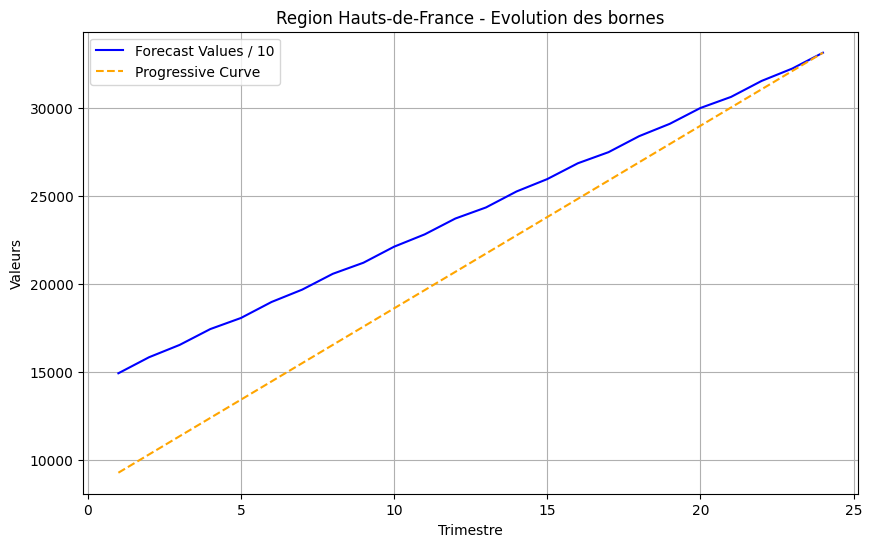

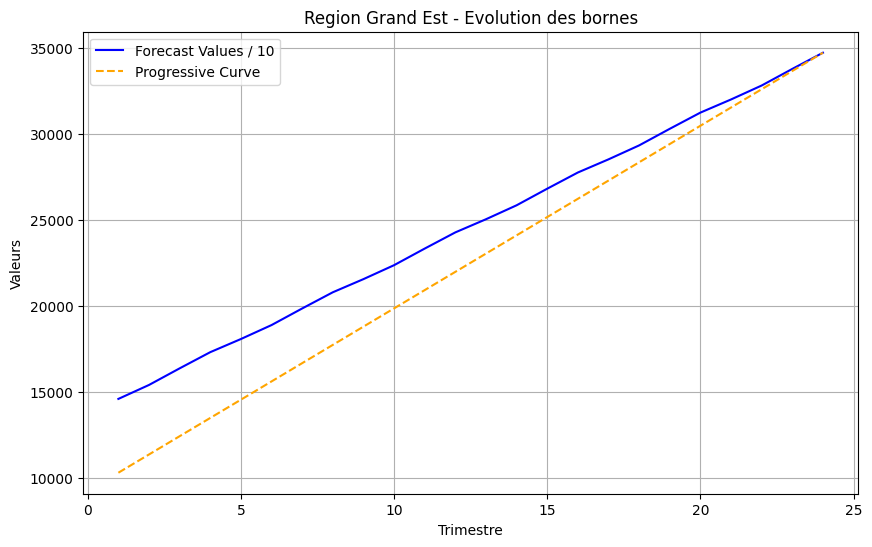

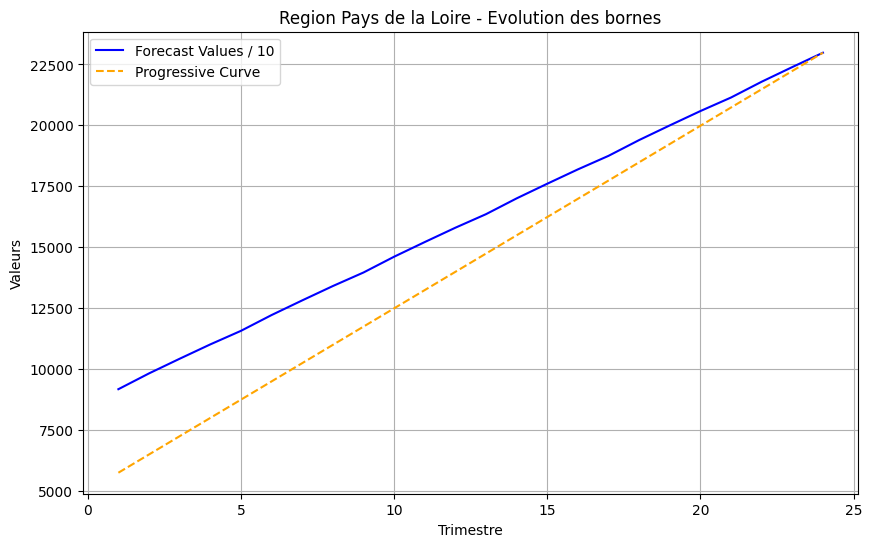

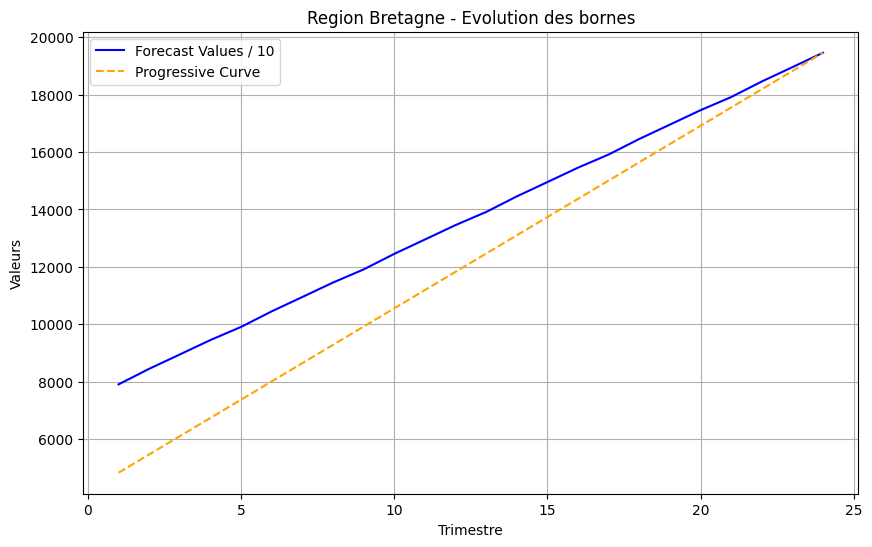

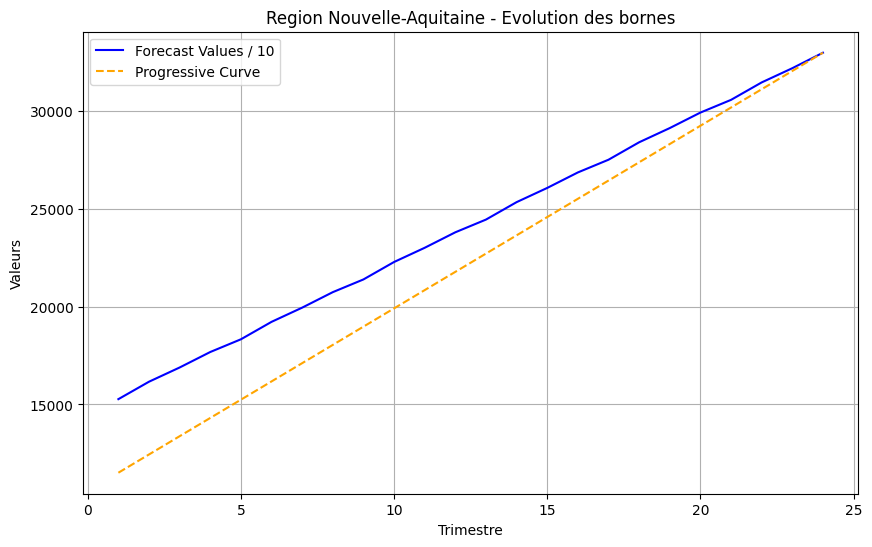

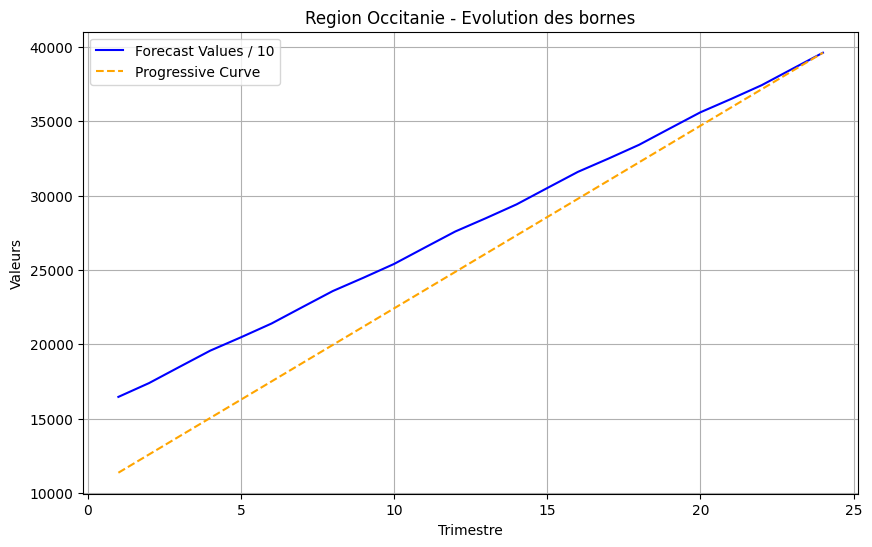

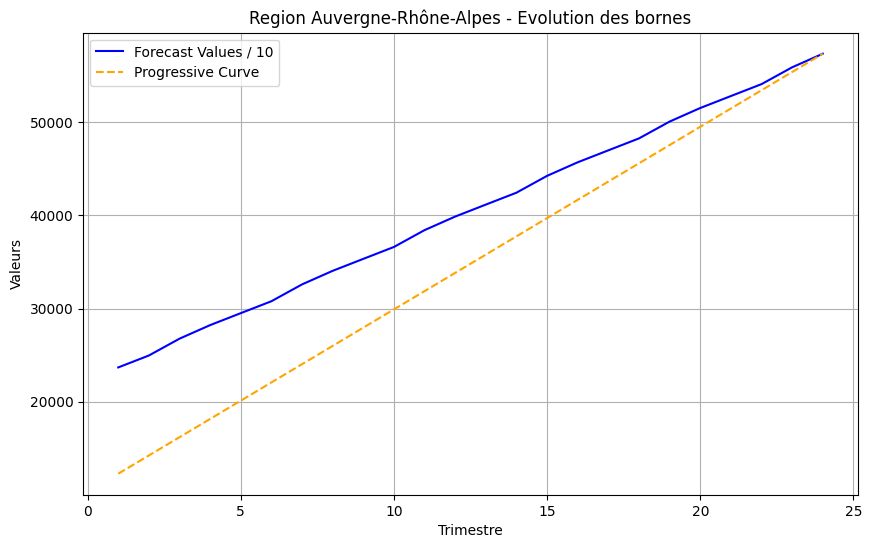

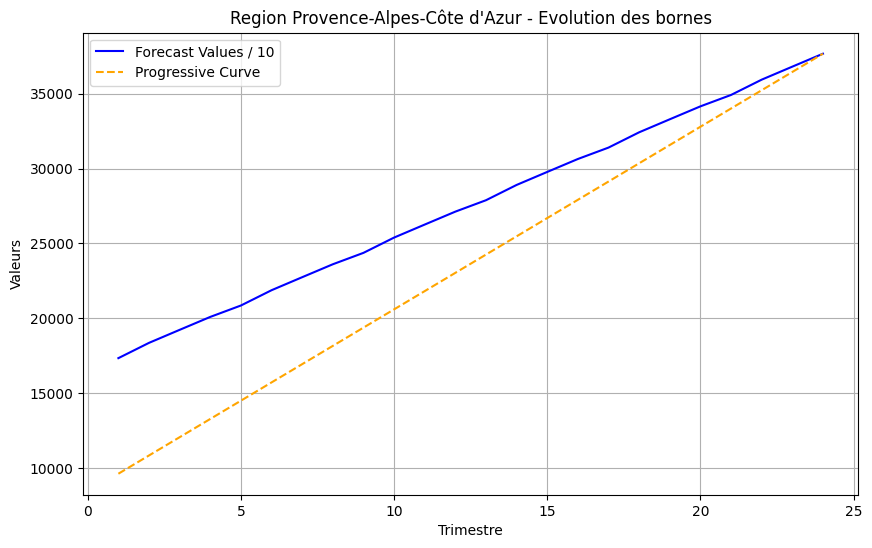

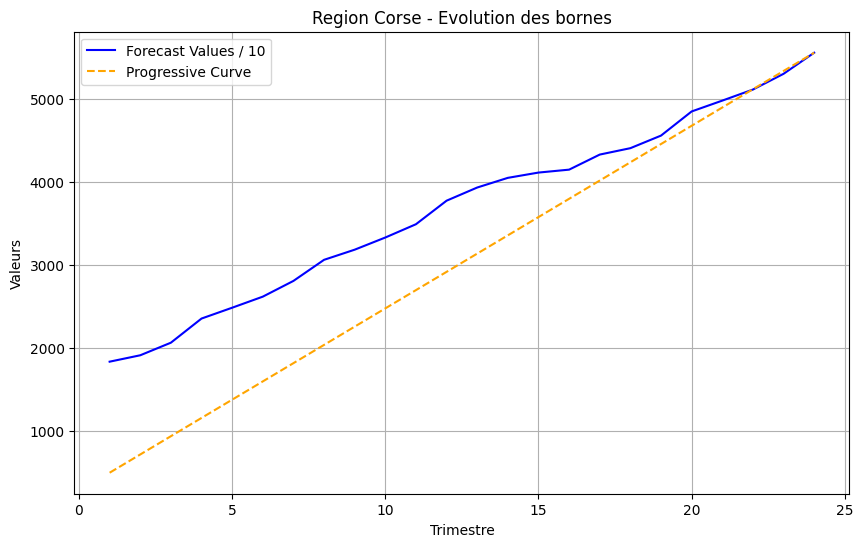

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Liste des régions uniques
regions = df['Nom_region'].unique()

# Fonction pour générer une courbe progressive
def generate_progressive_curve(start_value, target_value, steps):
    return np.linspace(start_value, target_value, steps)

# Tracer les graphes
for region in regions:
    regional_data = df[df['Nom_region'] == region].sort_values('Trimestre')

    trimestre = regional_data['Trimestre']
    forecast_curve = regional_data['Forecast_Values'] / 10
    start_value = regional_data['Bornes_Existantes'].iloc[0]
    target_value = forecast_curve.iloc[-1]
    progressive_curve = generate_progressive_curve(start_value, target_value, len(trimestre))

    plt.figure(figsize=(10, 6))
    plt.plot(trimestre, forecast_curve, label='Forecast Values / 10', color='blue')
    plt.plot(trimestre, progressive_curve, label='Progressive Curve', color='orange', linestyle='--')
    plt.title(f"Region {region} - Evolution des bornes")
    plt.xlabel("Trimestre")
    plt.ylabel("Valeurs")
    plt.legend()
    plt.grid()
    plt.show()


In [53]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Liste des régions uniques
regions = df['Nom_region'].unique()

# Fonction pour générer une courbe exponentielle
def generate_exponential_curve(start_value, target_value, steps):
    # Utilisation de la fonction exponentielle pour générer la courbe
    return start_value * np.exp(np.linspace(0, np.log(target_value/start_value), steps))

# Tracer les graphes et ajouter les valeurs à df
for region in regions:
    regional_data = df[df['Nom_region'] == region].sort_values('Trimestre')

    trimestre = regional_data['Trimestre']
    forecast_curve = regional_data['Forecast_Values'] / 10
    start_value = regional_data['Bornes_Existantes'].iloc[0]
    target_value = forecast_curve.iloc[-1]
    exponential_curve = generate_exponential_curve(start_value, target_value, len(trimestre))

    # Ajouter les valeurs de la courbe exponentielle dans df
    df.loc[df['Nom_region'] == region, 'Exponential_Curve'] = exponential_curve

    # Tracer les graphes avec Plotly
    fig = go.Figure()

    # Ajouter la courbe forecast
    fig.add_trace(go.Scatter(
        x=trimestre,
        y=forecast_curve,
        mode='lines',
        name="Nombre de borne nécessaire pour valider l'objectif",
        line=dict(color='blue')
    ))

    # Ajouter la courbe exponentielle
    fig.add_trace(go.Scatter(
        x=trimestre,
        y=exponential_curve,
        mode='lines',
        name='Recommandation de borne',
        line=dict(color='orange', dash='dash')
    ))

    # Ajouter des titres et des légendes
    fig.update_layout(
        title=f"Region {region} - Evolution des bornes",
        xaxis_title="Trimestre",
        yaxis_title="Valeurs",
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        template="plotly_white"
    )

    # Afficher le graphique
    fig.show()



# Affichage du DataFrame mis à jour
df


Region  Trimestre  Forecast_Values  Bornes_Existantes  \
0       11          1    423748.455159              19365   
1       11          2    448506.691651              19365   
2       11          3    482854.805023              19365   
3       11          4    513074.638071              19365   
4       11          5    539119.312251              19365   
..     ...        ...              ...                ...   
307     94         20     48462.964278                500   
308     94         21     49766.317549                500   
309     94         22     51097.037954                500   
310     94         23     52989.805937                500   
311     94         24     55528.299135                500   

     Bornes_A_Ajouter_Trimestrielles    Region_Name sens_trimestre  \
0                              23009  Ile-de-France        T1 2025   
1                              25485  Ile-de-France        T2 2025   
2                              28920  Ile-de-France        T3 2025   
3                              31942  Ile-de-France        T4 2025   
4                              34546  Ile-de-France        T1 2026   
..                               ...            ...            ...   
307                              917          Corse        T4 2029   
308                             1000          Corse        T1 2030   
309                              947          Corse        T2 2030   
310                              999          Corse        T3 2030   
311                             1079          Corse        T4 2030   

     somme_borne_a_ajouter  Exponential_Curve  ratio     Nom_region  
0                    42374       19365.000000  21.88  Île-de-France  
1                    67859       20875.781766  21.48  Île-de-France  
2                    96779       22504.428832  21.46  Île-de-France  
3                   128721       24260.136590  21.15  Île-de-France  
4                   163267       26152.817819  20.61  Île-de-France  
..                     ...                ...    ...            ...  
307                  10916        3653.259885  13.27          Corse  
308                  11916        4056.383606  12.27          Corse  
309                  12863        4503.990539  11.34          Corse  
310                  13862        5000.989241  10.60          Corse  
311                  14941        5552.829914  10.00          Corse  

[312 rows x 11 columns]

In [54]:
# Ajouter la colonne ratio
df['ratio'] = df['Forecast_Values'] / df['Exponential_Curve']
df

Region  Trimestre  Forecast_Values  Bornes_Existantes  \
0       11          1    423748.455159              19365   
1       11          2    448506.691651              19365   
2       11          3    482854.805023              19365   
3       11          4    513074.638071              19365   
4       11          5    539119.312251              19365   
..     ...        ...              ...                ...   
307     94         20     48462.964278                500   
308     94         21     49766.317549                500   
309     94         22     51097.037954                500   
310     94         23     52989.805937                500   
311     94         24     55528.299135                500   

     Bornes_A_Ajouter_Trimestrielles    Region_Name sens_trimestre  \
0                              23009  Ile-de-France        T1 2025   
1                              25485  Ile-de-France        T2 2025   
2                              28920  Ile-de-France        T3 2025   
3                              31942  Ile-de-France        T4 2025   
4                              34546  Ile-de-France        T1 2026   
..                               ...            ...            ...   
307                              917          Corse        T4 2029   
308                             1000          Corse        T1 2030   
309                              947          Corse        T2 2030   
310                              999          Corse        T3 2030   
311                             1079          Corse        T4 2030   

     somme_borne_a_ajouter  Exponential_Curve      ratio     Nom_region  
0                    42374       19365.000000  21.882182  Île-de-France  
1                    67859       20875.781766  21.484546  Île-de-France  
2                    96779       22504.428832  21.455990  Île-de-France  
3                   128721       24260.136590  21.148877  Île-de-France  
4                   163267       26152.817819  20.614196  Île-de-France  
..                     ...                ...        ...            ...  
307                  10916        3653.259885  13.265677          Corse  
308                  11916        4056.383606  12.268642          Corse  
309                  12863        4503.990539  11.344837          Corse  
310                  13862        5000.989241  10.595865          Corse  
311                  14941        5552.829914  10.000000          Corse  

[312 rows x 11 columns]

#Carte

##Créer carte

In [58]:
chemin_donnees = path + "tab_reco_borne_pour_ve2.csv"
df = pd.read_csv(chemin_donnees, sep=',')
df

Region  Trimestre  Forecast_Values  Bornes_Existantes  \
0        11          1    423748.455159              19365   
1        11          2    448506.691651              19365   
2        11          3    482854.805023              19365   
3        11          4    513074.638071              19365   
4        11          5    539119.312251              19365   
..      ...        ...              ...                ...   
307      94         20     48462.964278                500   
308      94         21     49766.317549                500   
309      94         22     51097.037954                500   
310      94         23     52989.805937                500   
311      94         24     55528.299135                500   

     Bornes_A_Ajouter_Trimestrielles    Region_Name sens_trimestre  \
0                              23009  Ile-de-France        T1 2025   
1                              25485  Ile-de-France        T2 2025   
2                              28920  Ile-de-France        T3 2025   
3                              31942  Ile-de-France        T4 2025   
4                              34546  Ile-de-France        T1 2026   
..                               ...            ...            ...   
307                              917          Corse        T4 2029   
308                             1000          Corse        T1 2030   
309                              947          Corse        T2 2030   
310                              999          Corse        T3 2030   
311                             1079          Corse        T4 2030   

     somme_borne_a_ajouter  Exponential_Curve  ratio  
0                    42374       19365.000000  21.88  
1                    67859       20875.781766  21.48  
2                    96779       22504.428832  21.46  
3                   128721       24260.136590  21.15  
4                   163267       26152.817819  20.61  
..                     ...                ...    ...  
307                  10916        3653.259885  13.27  
308                  11916        4056.383606  12.27  
309                  12863        4503.990539  11.34  
310                  13862        5000.989241  10.60  
311                  14941        5552.829914  10.00  

[312 rows x 10 columns]

In [59]:
import pandas as pd
import unicodedata

# Fonction pour enlever les accents
def enlever_accents(texte):
    if isinstance(texte, str):
        return ''.join(
            char for char in unicodedata.normalize('NFD', texte)
            if unicodedata.category(char) != 'Mn'
        )
    return texte

# Appliquer la fonction à la colonne Region_Name
df['Region_Name'] = df['Region_Name'].apply(enlever_accents)

df

Region  Trimestre  Forecast_Values  Bornes_Existantes  \
0        11          1    423748.455159              19365   
1        11          2    448506.691651              19365   
2        11          3    482854.805023              19365   
3        11          4    513074.638071              19365   
4        11          5    539119.312251              19365   
..      ...        ...              ...                ...   
307      94         20     48462.964278                500   
308      94         21     49766.317549                500   
309      94         22     51097.037954                500   
310      94         23     52989.805937                500   
311      94         24     55528.299135                500   

     Bornes_A_Ajouter_Trimestrielles    Region_Name sens_trimestre  \
0                              23009  Ile-de-France        T1 2025   
1                              25485  Ile-de-France        T2 2025   
2                              28920  Ile-de-France        T3 2025   
3                              31942  Ile-de-France        T4 2025   
4                              34546  Ile-de-France        T1 2026   
..                               ...            ...            ...   
307                              917          Corse        T4 2029   
308                             1000          Corse        T1 2030   
309                              947          Corse        T2 2030   
310                              999          Corse        T3 2030   
311                             1079          Corse        T4 2030   

     somme_borne_a_ajouter  Exponential_Curve  ratio  
0                    42374       19365.000000  21.88  
1                    67859       20875.781766  21.48  
2                    96779       22504.428832  21.46  
3                   128721       24260.136590  21.15  
4                   163267       26152.817819  20.61  
..                     ...                ...    ...  
307                  10916        3653.259885  13.27  
308                  11916        4056.383606  12.27  
309                  12863        4503.990539  11.34  
310                  13862        5000.989241  10.60  
311                  14941        5552.829914  10.00  

[312 rows x 10 columns]

In [60]:
valeurs_uniques = df['Region_Name'].unique()
valeurs_uniques

array(['Ile-de-France', 'Centre-Val de Loire', 'Bourgogne-Franche-Comte',
       'Normandie', 'Hauts-de-France', 'Grand Est', 'Pays de la Loire',
       'Bretagne', 'Nouvelle-Aquitaine', 'Occitanie',
       'Auvergne-Rhone-Alpes', "Provence-Alpes-Cote d'Azur", 'Corse'],
      dtype=object)

In [61]:
chemin_geojson = "/content/drive/MyDrive/PIP2025_G8/Donnees/Autres données/regions.geojson"
geojson = gpd.read_file(chemin_geojson)
geojson

code                         nom  \
0    11               Île-de-France   
1    24         Centre-Val de Loire   
2    27     Bourgogne-Franche-Comté   
3    28                   Normandie   
4    32             Hauts-de-France   
5    44                   Grand Est   
6    52            Pays de la Loire   
7    53                    Bretagne   
8    75          Nouvelle-Aquitaine   
9    76                   Occitanie   
10   84        Auvergne-Rhône-Alpes   
11   93  Provence-Alpes-Côte d'Azur   
12   94                       Corse   

                                             geometry  
0   POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...  
1   POLYGON ((2.87463 47.52042, 2.87984 47.51671, ...  
2   POLYGON ((3.62942 46.74946, 3.62655 46.75228, ...  
3   MULTIPOLYGON (((-1.11962 49.35557, -1.11554 49...  
4   POLYGON ((4.1409 49.97876, 4.14407 49.97625, 4...  
5   POLYGON ((4.23316 49.95775, 4.2369 49.95858, 4...  
6   MULTIPOLYGON (((-2.62284 47.40975, -2.62341 47...  
7   MULTIPOLYGON (((-3.47716 48.88127, -3.47863 48...  
8   MULTIPOLYGON (((1.41519 46.34722, 1.41675 46.3...  
9   MULTIPOLYGON (((1.78613 42.57362, 1.78661 42.5...  
10  POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...  
11  MULTIPOLYGON (((6.94834 44.65482, 6.94769 44.6...  
12  MULTIPOLYGON (((8.5864 41.87389, 8.58667 41.87...

In [62]:

# Charger les données
chemin_donnees = path + "tab_reco_borne_pour_ve2.csv"
chemin_geojson = "/content/drive/MyDrive/PIP2025_G8/Donnees/Autres données/regions.geojson"

df = pd.read_csv(chemin_donnees, sep=',')
df['Region'] = df['Region'].astype(int).astype(str)
df['ratio'] = df['ratio'].round(2)  # Arrondir les ratios à 2 décimales
df

Region  Trimestre  Forecast_Values  Bornes_Existantes  \
0       11          1    423748.455159              19365   
1       11          2    448506.691651              19365   
2       11          3    482854.805023              19365   
3       11          4    513074.638071              19365   
4       11          5    539119.312251              19365   
..     ...        ...              ...                ...   
307     94         20     48462.964278                500   
308     94         21     49766.317549                500   
309     94         22     51097.037954                500   
310     94         23     52989.805937                500   
311     94         24     55528.299135                500   

     Bornes_A_Ajouter_Trimestrielles    Region_Name sens_trimestre  \
0                              23009  Ile-de-France        T1 2025   
1                              25485  Ile-de-France        T2 2025   
2                              28920  Ile-de-France        T3 2025   
3                              31942  Ile-de-France        T4 2025   
4                              34546  Ile-de-France        T1 2026   
..                               ...            ...            ...   
307                              917          Corse        T4 2029   
308                             1000          Corse        T1 2030   
309                              947          Corse        T2 2030   
310                              999          Corse        T3 2030   
311                             1079          Corse        T4 2030   

     somme_borne_a_ajouter  Exponential_Curve  ratio  
0                    42374       19365.000000  21.88  
1                    67859       20875.781766  21.48  
2                    96779       22504.428832  21.46  
3                   128721       24260.136590  21.15  
4                   163267       26152.817819  20.61  
..                     ...                ...    ...  
307                  10916        3653.259885  13.27  
308                  11916        4056.383606  12.27  
309                  12863        4503.990539  11.34  
310                  13862        5000.989241  10.60  
311                  14941        5552.829914  10.00  

[312 rows x 10 columns]

In [91]:
# Trier le DataFrame par région et par trimestre pour garantir l'ordre correct
df = df.sort_values(by=['Region', 'Trimestre'])

# Calculer la colonne 'nb_borne_a_ajouter'
df['nb_borne_a_ajouter'] = df.groupby('Region')['Exponential_Curve'].diff().fillna(0)

# Convertir les valeurs du premier trimestre de chaque région à 0
df.loc[df['Trimestre'] == 1, 'nb_borne_a_ajouter'] = 0

# Vérifier le résultat
df

Region  Trimestre  Forecast_Values  Bornes_Existantes  \
0       11          1    423748.455159              19365   
1       11          2    448506.691651              19365   
2       11          3    482854.805023              19365   
3       11          4    513074.638071              19365   
4       11          5    539119.312251              19365   
..     ...        ...              ...                ...   
307     94         20     48462.964278                500   
308     94         21     49766.317549                500   
309     94         22     51097.037954                500   
310     94         23     52989.805937                500   
311     94         24     55528.299135                500   

     Bornes_A_Ajouter_Trimestrielles    Region_Name sens_trimestre  \
0                              23009  Ile-de-France        T1 2025   
1                              25485  Ile-de-France        T2 2025   
2                              28920  Ile-de-France        T3 2025   
3                              31942  Ile-de-France        T4 2025   
4                              34546  Ile-de-France        T1 2026   
..                               ...            ...            ...   
307                              917          Corse        T4 2029   
308                             1000          Corse        T1 2030   
309                              947          Corse        T2 2030   
310                              999          Corse        T3 2030   
311                             1079          Corse        T4 2030   

     somme_borne_a_ajouter  Exponential_Curve  ratio  nb_borne_a_ajouter  
0                    42374       19365.000000  21.88            0.000000  
1                    67859       20875.781766  21.48         1510.781766  
2                    96779       22504.428832  21.46         1628.647066  
3                   128721       24260.136590  21.15         1755.707758  
4                   163267       26152.817819  20.61         1892.681229  
..                     ...                ...    ...                 ...  
307                  10916        3653.259885  13.27          363.061254  
308                  11916        4056.383606  12.27          403.123721  
309                  12863        4503.990539  11.34          447.606933  
310                  13862        5000.989241  10.60          496.998703  
311                  14941        5552.829914  10.00          551.840672  

[312 rows x 11 columns]

In [93]:
ligne = df.loc[df['Region'] == '94']
ligne

Region  Trimestre  Forecast_Values  Bornes_Existantes  \
288     94          1     18359.924198                500   
289     94          2     19130.000174                500   
290     94          3     20643.860259                500   
291     94          4     23548.000532                500   
292     94          5     24851.353802                500   
293     94          6     26182.074207                500   
294     94          7     28074.842191                500   
295     94          8     30613.335389                500   
296     94          9     31833.593817                500   
297     94         10     33297.448225                500   
298     94         11     34895.364118                500   
299     94         12     37727.809479                500   
300     94         13     39311.413937                500   
301     94         14     40474.818095                500   
302     94         15     41110.352575                500   
303     94         16     41461.773395                500   
304     94         17     43274.887944                500   
305     94         18     44044.963921                500   
306     94         19     45558.824005                500   
307     94         20     48462.964278                500   
308     94         21     49766.317549                500   
309     94         22     51097.037954                500   
310     94         23     52989.805937                500   
311     94         24     55528.299135                500   

     Bornes_A_Ajouter_Trimestrielles Region_Name sens_trimestre  \
288                              191       Corse        T1 2025   
289                              138       Corse        T2 2025   
290                              190       Corse        T3 2025   
291                              270       Corse        T4 2025   
292                              353       Corse        T1 2026   
293                              300       Corse        T2 2026   
294                              352       Corse        T3 2026   
295                              432       Corse        T4 2026   
296                              514       Corse        T1 2027   
297                              462       Corse        T2 2027   
298                              514       Corse        T3 2027   
299                              594       Corse        T4 2027   
300                              676       Corse        T1 2028   
301                              623       Corse        T2 2028   
302                              675       Corse        T3 2028   
303                              755       Corse        T4 2028   
304                              838       Corse        T1 2029   
305                              785       Corse        T2 2029   
306                              837       Corse        T3 2029   
307                              917       Corse        T4 2029   
308                             1000       Corse        T1 2030   
309                              947       Corse        T2 2030   
310                              999       Corse        T3 2030   
311                             1079       Corse        T4 2030   

     somme_borne_a_ajouter  Exponential_Curve  ratio  nb_borne_a_ajouter  
288                    691         500.000000  36.72            0.000000  
289                    829         555.173151  34.46           55.173151  
290                   1019         616.434456  33.49           61.261305  
291                   1289         684.455719  34.40           68.021263  
292                   1642         759.982877  32.70           75.527158  
293                   1942         843.844177  31.03           83.861300  
294                   2294         936.959262  29.96           93.115085  
295                   2726        1040.349252  29.43          103.389990  
296                   3240        1155.147946  27.56          114.798693  
297                   3702        1282.614251  25.96

In [96]:
import pandas as pd
import folium
import json
from IPython.display import display
import numpy as np

# Charger les données
chemin_donnees = path + "tab_reco_borne_pour_ve2.csv"
chemin_geojson = "/content/drive/MyDrive/PIP2025_G8/Donnees/Autres données/regions.geojson"

df = pd.read_csv(chemin_donnees, sep=',')
df['Region'] = df['Region'].astype(int).astype(str)
df['ratio'] = df['ratio'].round(2)  # Arrondir les ratios à 2 décimales
# Trier le DataFrame par région et par trimestre pour garantir l'ordre correct
df = df.sort_values(by=['Region', 'Trimestre'])
# Calculer la colonne 'nb_borne_a_ajouter'
df['nb_borne_a_ajouter'] = df.groupby('Region')['Exponential_Curve'].diff().fillna(0)
# Convertir les valeurs du premier trimestre de chaque région à 0
df.loc[df['Trimestre'] == 1, 'nb_borne_a_ajouter'] = 0



with open(chemin_geojson, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# Fonction pour afficher une carte avec une échelle personnalisée
def afficher_carte(trimestre, chemin_sauvegarde):
    # Filtrer les données pour le trimestre courant
    df_trimestre = df[df['Trimestre'] == trimestre]

    # Définir une échelle personnalisée : Plus de seuils pour les petites valeurs
    seuils_personnalises = [10, 11, 12, 14, 17, 20, 40]

    # Créer une carte centrée sur la France
    carte = folium.Map(location=[46.603354, 1.888334], zoom_start=6)

    # Ajouter un choroplèthe avec l'échelle personnalisée
    folium.Choropleth(
        geo_data=geojson_data,
        data=df_trimestre,
        columns=['Region', 'ratio'],
        key_on='feature.properties.code',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'Ratio des bornes à ajouter (Trimestre {trimestre})',
        threshold_scale=seuils_personnalises
    ).add_to(carte)

    # Ajouter des tooltips pour chaque région
    for feature in geojson_data['features']:
        region_code = feature['properties']['code']
        region_name = feature['properties']['nom']

        # Vérification de la correspondance entre les codes
        matching_row = df_trimestre[df_trimestre['Region'] == region_code]

        if not matching_row.empty:
            ratio = matching_row['ratio'].values[0]
            exp_curve = np.ceil(matching_row['nb_borne_a_ajouter'].values[0])  # Récupérer la valeur d'nb_borne_a_ajouter
        else:
            ratio = 'Non disponible'
            exp_curve = 'Non disponible'

        # Ajouter un tooltip au GeoJSON
        folium.GeoJson(
            feature,
            tooltip=folium.Tooltip(f"{region_name}: Ratio {ratio}, Nombre de borne ajouté ce trimestre: {exp_curve}")
        ).add_to(carte)

    # Sauvegarder la carte en HTML
    carte.save(chemin_sauvegarde)

    # Retourner la carte
    return carte

# Afficher la carte pour le Trimestre 1
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_1_Personnalisee.html"
carte_trimestre = afficher_carte(1, chemin_sauvegarde)
display(carte_trimestre)


Output hidden; open in https://colab.research.google.com to view.

##Générer carte

In [97]:
# Afficher la carte pour le Trimestre 1
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_1.html"
carte_trimestre = afficher_carte(1, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [98]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_2.html"
carte_trimestre = afficher_carte(2, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [99]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_3.html"
carte_trimestre = afficher_carte(3, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [100]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_4.html"
carte_trimestre = afficher_carte(4, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [101]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_5.html"
carte_trimestre = afficher_carte(5, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [102]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_6.html"
carte_trimestre = afficher_carte(6, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [103]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_7.html"
carte_trimestre = afficher_carte(7, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [104]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_8.html"
carte_trimestre = afficher_carte(8, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [105]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_9.html"
carte_trimestre = afficher_carte(9, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [106]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_10.html"
carte_trimestre = afficher_carte(10, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [107]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_11.html"
carte_trimestre = afficher_carte(11, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [108]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_12.html"
carte_trimestre = afficher_carte(12, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [109]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_13.html"
carte_trimestre = afficher_carte(13, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [110]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_14.html"
carte_trimestre = afficher_carte(14, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [111]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_15.html"
carte_trimestre = afficher_carte(15, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [112]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_16.html"
carte_trimestre = afficher_carte(16, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [113]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_17.html"
carte_trimestre = afficher_carte(17, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [114]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_18.html"
carte_trimestre = afficher_carte(18, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [115]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_19.html"
carte_trimestre = afficher_carte(19, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [116]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_20.html"
carte_trimestre = afficher_carte(20, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [117]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_21.html"
carte_trimestre = afficher_carte(21, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [118]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_22.html"
carte_trimestre = afficher_carte(22, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [119]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_23.html"
carte_trimestre = afficher_carte(23, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.

In [120]:
chemin_sauvegarde = "/content/drive/MyDrive/PIP2025_G8/Carte/Carte_Trimestre_24.html"
carte_trimestre = afficher_carte(24, chemin_sauvegarde)
display(carte_trimestre)

Output hidden; open in https://colab.research.google.com to view.